In [2]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [3]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Lab_tested_data.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [4]:
Sample_ID = Lab_tested_data.iloc[:,0]
PH_Value = Lab_tested_data.iloc[:,2]

In [5]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[100:1100,100:1100]
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) > 1:
            Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
            Id_1_index = Result[0]
            Id_2_index = Result[1]
            print(id)
            Labels.append([filename,img,(PH_Value[Id_1_index]+PH_Value[Id_2_index])/2])
        else:
            continue
    return Labels

In [6]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [8]:
Ph_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.average(red_channel)/np.average(green_channel))/np.average(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    Ph_index.append([temp,data[2]])

0.0075481494786669955
0.007016311442157353
0.006561879538150916
0.006471341533806674
0.006931103178713626
0.006604194115304503
0.01340611689193149
0.011153781068756403
0.0074400303126090535
0.006560975186620802
0.006865078113593626
0.008521922039582108
0.006724375101752211
0.006887665024695213
0.006922155021009176
0.006895714716775506
0.006878059580899804
0.006405308242164197
0.006912635778754541
0.007632041556648538
0.006178225543331347
0.005651299165970777
0.006247032148256726
0.005990564260169747
0.006363307534194335
0.006095178798741366
0.005672101369712029
0.006014755608097694
0.00705962175571629
0.006746882066903114
0.007318920518803309
0.007157536848546805
0.006711441114147436
0.00601363550830826
0.005993727477376328
0.006718203701525288
0.006685588345387581
0.005913238622386202
0.006081926229045055
0.006050541129514836
0.006708160374059784
0.0061089532197210195
0.006218370536899463
0.005984571165165901
0.006762361125834801
0.006801939715954487
0.006684662502681999
0.00655863905

0.006609412605762269
0.008043634240935883
0.010467274741170821
0.011047042194634288
0.00656130277507485
0.008741925575199127
0.006381006610703551
0.006751412579550408
0.006288068662902922
0.006436227242556037
0.0068539089354574464
0.007883770822203736
0.006425777584151421
0.006569302319626903
0.006542428212032783
0.006476781963066792
0.007365682277729827
0.006837238831885972
0.008961186647110656
0.006698621203714631
0.006950584698688155
0.007678453284250724
0.005962667565644388
0.007012341973279945
0.007632154111287816
0.006970669058320029
0.00544749349644775
0.006169093221584492
0.008285429443439336
0.006799504047539456
0.006631451002443103
0.008028725065961764
0.006713333397004066
0.005786167664059948
0.007608124591896694
0.006122650262180671
0.008456097302614532
0.007414165396810349
0.0070334124125181864
0.008874699406165094
0.008329264281117861
0.007316370206549114
0.0065616101659958315
0.007694995851765531
0.0060886045832835335
0.006906860903019159
0.007651632033279537
0.019677754

In [9]:
data1 = pd.DataFrame(Ph_index,columns=['PH_Index','PH_Value'])

In [10]:
data1.to_csv("Ph_Index_with_Ph_value.csv")

print(data1)

     PH_Index  PH_Value
0    0.007548      7.95
1    0.007016      7.95
2    0.006562      7.90
3    0.006471      7.90
4    0.006931      7.75
..        ...       ...
696  0.006624      7.85
697  0.004715      7.80
698  0.007664      7.80
699  0.014745      7.75
700  0.011667      7.75

[701 rows x 2 columns]


In [16]:
Ph_index = data1.iloc[:,0]
print(Ph_index)

0      0.007548
1      0.007016
2      0.006562
3      0.006471
4      0.006931
         ...   
696    0.006624
697    0.004715
698    0.007664
699    0.014745
700    0.011667
Name: PH_Index, Length: 701, dtype: float64


In [17]:
Ph_value = data1.iloc[:,1]
print(Ph_value)

0      7.95
1      7.95
2      7.90
3      7.90
4      7.75
       ... 
696    7.85
697    7.80
698    7.80
699    7.75
700    7.75
Name: PH_Value, Length: 701, dtype: float64


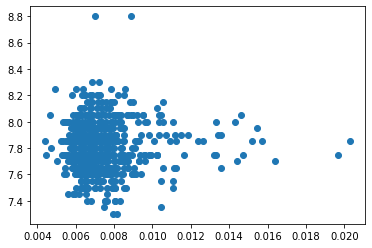

In [18]:
plt.scatter(Ph_index,Ph_value)

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [20]:
#Output variable or Tested
y1 = np.array(Ph_value)

In [21]:
#Input featuree
x1 = np.array(Ph_index)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [31]:
model = Sequential()
model.add(Dense(8, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2671      
Total params: 26,717
Trainable params: 26,717
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(X_val)

Epoch 1/30
3/3 [==============================] - 0s 42ms/step - loss: 60.5640 - mse: 60.5640 - mae: 7.7801 - val_loss: 60.4025 - val_mse: 60.4025 - val_mae: 7.7689
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 59.3538 - mse: 59.3538 - mae: 7.7019 - val_loss: 58.9476 - val_mse: 58.9476 - val_mae: 7.6747
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 57.8126 - mse: 57.8126 - mae: 7.6012 - val_loss: 57.1860 - val_mse: 57.1860 - val_mae: 7.5591
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 55.9613 - mse: 55.9613 - mae: 7.4784 - val_loss: 55.1003 - val_mse: 55.1003 - val_mae: 7.4198
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 53.7842 - mse: 53.7842 - mae: 7.3312 - val_loss: 52.6730 - val_mse: 52.6730 - val_mae: 7.2544
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 51.2604 - mse: 51.2604 - mae: 7.1571 - val_loss: 49.8921 - val_mse: 49.8921 - val_mae: 7.0602
Epoch 7/30
3/3 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


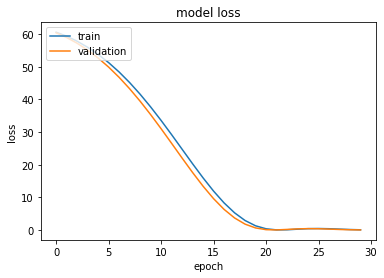

In [33]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

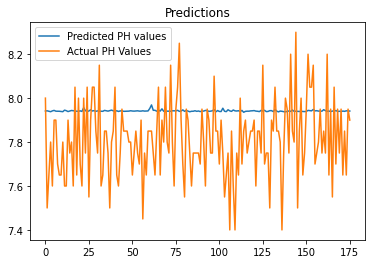

In [43]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted PH values', 'Actual PH Values'], loc='upper left')
plt.show()